# 8 Deep Learning with Keras

## 8.2 Convolutional Neural Networks with Keras

### Convolutional Neural Networks

Hubel & Wiesel won in 1981 the Nobel prize for showing how the visual cortex of a mammal processes images:
- Neurons focus on specific local regions of the image, not the complete image
- Neurons activate to particular features in the image
LeCun published in 1998 LeNet-5, introducing convolutional neural networks.

We use **tensors** (n-dimensional arrays of arrays): scalar -> vector/array -> matrix -> tensor; with images, a typical example could be: `[Images, Height, Width, Channel]`.

**Dense vs Convolutional layers**:
- In a densly or fully connected layer, all neurons are connected
- In a CNN, we have kernels or filters that sweep the image with convolution operations. Pixel values under a filter location are processed to one value, and become a unique pixel of a feature in the convolutional layer; hence, only the local/neighboring pixels (= neurons) under a convolutional filter are connected, not the pixels of the complete image!
- Additionally, in each convolutional layer, we can have `N` filters; thus, the output is a **feature map** of `N` channels (or `N` feature maps?).

We call **feedforward** pass to the action of inputing an image to a ANN/CNN to obtain the predicted class.

**Padding** is necessary if the convolutional filter is centered in the edge pixels of the image (e.g., fill imaginary pixels with value 0); if we match the top-left corner of the filter with the image, no padding is used.

We move the filter left-right & top-down with a **stride** of `s` pixels; it somehow defines how fast we move with the kernel/filter on the image.

**Filters** are `n x n` **kernels** that are applied to transfom pixel values according to the neighboring pixel-value distribution. Filter weights are the ones that are estimated during training. The result of applying a filter to an image is a **feature map**, aka. **activation map**.

In addition to convolutions, we can use **pooling**: in a local neighborhood (eg., `2 x 2` window) of the image/feature map, we take a representative pixel value, eg.: maximum, average, etc.

It is common to use **dropout**, too: neurons are randomly de-activated in a feedforward pass; this has the effect of preventing **overfitting**.

The image size is **compressed** as we apply convolutions and pooling. Deeper layers account for higher level features.

Note: convolutions are not exclusive of images; we can apply them to **1D** data, too (e.g., a series); in the special case of images we have **2D** convolutions with 2D filters.

Popular neural network architectures (they are basically a set of designed layers):
- LeNet-5
- AlexNet
- GoogLeNet
- ResNet

### Example 1: MNIST Dataset

MNIST dataset is a popular benchmarking dataset in which we ave samples of hand-written symbols for 0-9 digits. Here are the properties:
- 60k training images, 10k test images
- Each image is 28x28 pixels, single channel
- Pixel values are normalized to [0,1]
- The dataset is a 4-dimensional array:
    (Samples, Width, Height, Channels) -> (60000, 28, 28, 1)
- Labels come in an array in which each element is the digit label 0-9; but we transform it into the **one-hot-encondig**: 0/1 for each of the 0-9 classes, i.e.: (Samples, Classes) -> (60000, 10); 4 = (0,0,0,0,1,0,0,0,0,0)

#### Load and prepare dataset

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
img = x_train[0]

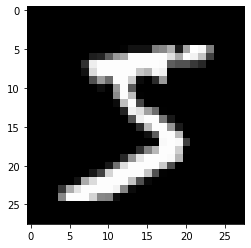

In [7]:
plt.imshow(img, cmap='gray') # to reverse cmap, append _r: 'gray_r'

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

In [18]:
# We transform y to one-hot
# in order to avoid the network to think it's some kind of regression
# We could do it with a for loop
# but there's a utility for that

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [22]:
y_cat_train.shape

(60000, 10)

In [23]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
# We need to normalize the pixel values: [0,255] -> [0,1]
img.max()

255

In [25]:
x_test = x_test / x_test.max()
x_train = x_train / x_train.max()

In [26]:
x_test[0].max()

1.0

In [27]:
x_train[0].max()

1.0

In [28]:
# We need to reshape x to have a field for channels
# eventhough we have a single channel in our example

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
x_train = x_train.reshape((60000, 28, 28, 1))

In [31]:
x_train.shape

(60000, 28, 28, 1)

In [32]:
x_test = x_test.reshape((10000, 28, 28, 1))

In [33]:
x_test.shape

(10000, 28, 28, 1)

#### Create model

In [34]:
from tensorflow.keras.models import Sequential
# We load all layer types we're going to use
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
# We create the model with the layers
model = Sequential()

# CONVOLUTIONAL layer:
# 32 filters is quite standard (if complex images, more)
# 4x4 size for the filter kernels is also standard (3-4)
# input shape (for each image) is given by the dataset image shape
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# POOLING layer:
# 2x2 is also quiste a standard size for max-pooling
# Note: in the new version of keras it's called MaxPooling2D - but MaxPool2D also works
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN layer: 2D (images) --> 1D (for later class array)
model.add(Flatten())

# Map the flattened array to the class array with a fully connected layer
# The mapping is done in 2 steps (that's also quite usual)
# 28x28 = 784
# 28 - (3) = 25 -> 25x25 = 625; 4x4 kernel without padding and stride=1 results in 25 pixels
# floor(25/2)*floor(25/2) = 12x12 = 144; max-pool: every 4 pixels 1 (max) taken
# 144 -> 128 -> 10 (classes)
# Often powers of 2 are used as steps: 64, 128, 256, 512, 1024, ...
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # last activation to classes requires softmax for probabilities

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train
model.fit(x_train, y_cat_train, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1332 - accuracy: 0.9599
Epoch 2/2
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0464 - accuracy: 0.9858


In [46]:
# Evaluation
# Get metrics used to evaluate: loss, acc
model.metrics_names

['loss', 'accuracy']

In [47]:
# Test set should be similar to train set in terms of accuracy
# If train set is much better, we have overfitted
# loss, accuracy
model.evaluate(x_test, y_cat_test,verbose=0)

[0.04409347255442117, 0.987]

In [48]:
from sklearn.metrics import classification_report

In [49]:
# IMPORTANT NOTE:
# model.predict_classes() does not deliver predictions as one-hot
# but as class categories 0-9
# HOWEVER, note that we train with categorical y values!
# This difference is relevant for the classification report
y_pred = model.predict_classes(x_test)

In [50]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [51]:
# We get very good results
# This type of standard conv networks (withthe architecture we defined)
# seems to work very well for hand-written digits
print(classification_report(y_test, y_pred)) # labels, predictions

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Example 2: CIFAR-10 Dataset

In [52]:
from tensorflow.keras.datasets import cifar10

In [53]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 16s 0us/step


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# 32x32 images, 3 channels
# train: 50k images
# test: 10k images
x_train.shape

(50000, 32, 32, 3)

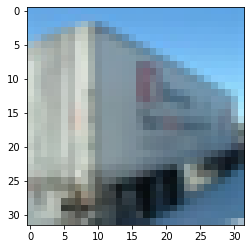

In [56]:
plt.imshow(x_train[15])

In [57]:
x_test.shape

(10000, 32, 32, 3)

In [58]:
x_test[0].max()

255

In [62]:
# Normalize
x_test = x_test / x_test.max()
x_train = x_train / x_train.max()

In [63]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [64]:
y_train.shape

(50000, 1)

In [65]:
# Transform to one-hot encoding
from tensorflow.keras.utils import to_categorical

In [66]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [67]:
y_cat_train.shape

(50000, 10)

In [68]:
# We can get the category names from Wikipedia:
# https://en.wikipedia.org/wiki/CIFAR-10

In [69]:
category_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [70]:
len(category_names)

10

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [73]:
# We create the model with the layers
model = Sequential()

# CONVOLUTIONAL layer 1
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOLING layer:
model.add(MaxPool2D(pool_size=(2,2)))

# CONVOLUTIONAL layer 2: since images are more complex, we add another conv-maxpool pair
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
# POOLING layer:
# Note: in the new version of keras it's called MaxPooling2D - but MaxPool2D also works
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN layer: 2D (images) --> 1D (for later class array)
model.add(Flatten())

# Map the flattened array to the class array with a fully connected layer
# Often powers of 2 are used; 512 gives a slightly better performance
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax')) # last activation to classes requires softmax for probabilities

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [81]:
# Train
model.fit(x_train, y_cat_train, epochs=2)

Train on 50000 samples
Epoch 1/2
50000/50000 [==============================] - 104s 2ms/sample - loss: 1.5269 - accuracy: 0.4517
Epoch 2/2
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.1732 - accuracy: 0.5880


In [82]:
# Evaluate
model.metrics_names

['loss', 'accuracy']

In [83]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.2094071035385132, 0.5733]

In [84]:
from sklearn.metrics import classification_report

In [85]:
y_pred = model.predict_classes(x_test)

In [86]:
print(classification_report(y_test, y_pred)) # labels, predictions

              precision    recall  f1-score   support

           0       0.72      0.54      0.61      1000
           1       0.90      0.47      0.62      1000
           2       0.56      0.38      0.45      1000
           3       0.39      0.56      0.46      1000
           4       0.49      0.53      0.51      1000
           5       0.66      0.26      0.38      1000
           6       0.72      0.64      0.68      1000
           7       0.48      0.79      0.60      1000
           8       0.54      0.88      0.67      1000
           9       0.71      0.69      0.70      1000

    accuracy                           0.57     10000
   macro avg       0.62      0.57      0.57     10000
weighted avg       0.62      0.57      0.57     10000

